In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="white")

np.random.seed(0)

from sklearn.model_selection import KFold

In [2]:
import data_utils

datasets = {
    "adult": data_utils.load_adult_dataset(),
    "mushroom": data_utils.load_mushroom_dataset(),
    "nursery": data_utils.load_nursery_dataset(),
    "digit": data_utils.load_digit_dataset(),
    "skin": data_utils.load_skin_dataset(),
}

In [3]:
# Train GaussianNB from Sklearn for basline 10-fold average training and testing accuracies

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

kfold = KFold(n_splits=10, random_state=42)

/home/gilang/.cache/pypoetry/virtualenvs/pydp-FONabfq3-py3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [4]:
def get_fit_result(clf, kfold, df, X, y):
    
    training_accuracies = []
    testing_accuracies = []

    for train, test in kfold.split(df.values):

        X_train = X.values[train]
        y_train = y.values[train]

        X_test = X.values[test]
        y_test = y.values[test]

        clf.fit(X_train, y_train)

        training_acucracy = clf.score(X_train, y_train)
        testing_acucracy = clf.score(X_test, y_test)

        training_accuracies.append(training_acucracy)
        testing_accuracies.append(testing_acucracy)

    mean_train_acc = np.mean(training_accuracies)
    mean_test_acc = np.mean(testing_accuracies)
    
    print("Average Training Accuracy")
    print(mean_train_acc)
    print("Average Testing Accuracy")
    print(mean_test_acc)
    
    return mean_train_acc , mean_test_acc

baselines = {}

for name, dataset in datasets.items():
    baseline_result = get_fit_result(clf, kfold, dataset[0], dataset[1], dataset[2])
    baselines[name] = baseline_result

Average Training Accuracy
0.7951810130150003
Average Testing Accuracy
0.7953074892935194
Average Training Accuracy
0.965356642758566
Average Testing Accuracy
0.9367470719042167
Average Training Accuracy
0.83596536351166
Average Testing Accuracy
0.7715277777777778
Average Training Accuracy
0.7993080268880981
Average Testing Accuracy
0.7909252669039146
Average Training Accuracy
0.9253783621397431
Average Testing Accuracy
0.8928012046502467


In [5]:
from pydp.ml.naive_bayes import GaussianNB


epsilons = [10.0, 1.0, 0.1, 0.05, 0.01, 0.005, 0.001]

dp_results = {}

for name, dataset in datasets.items():
    
    mean_train_accs = []
    mean_test_accs = []
    
    for epsilon in epsilons:
        clf = GaussianNB(epsilon=epsilon)

        training_accuracy, test_accuracy = get_fit_result(clf, kfold, dataset[0], dataset[1], dataset[2])

        mean_train_accs.append(training_accuracy * 100)
        mean_test_accs.append(test_accuracy * 100 )
        
    dp_results[name] = mean_train_accs, mean_test_accs

/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.758798009399016
Average Testing Accuracy
0.7583307621686498


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.6911780070076436
Average Testing Accuracy
0.6914400961376707


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.6901169080234085
Average Testing Accuracy
0.6876304976090054


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.6233382362524147
Average Testing Accuracy
0.6268954450025988


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.3987363325774006
Average Testing Accuracy
0.4002249831962758


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.5204769154304216
Average Testing Accuracy
0.5171452301940482


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.402092611837536
Average Testing Accuracy
0.4049677919189739


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.8886817195215866
Average Testing Accuracy
0.7972282309029988


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.7093375079726092
Average Testing Accuracy
0.5656341834354304


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.4725374065397694
Average Testing Accuracy
0.4938155526875466


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.5275844329622909
Average Testing Accuracy
0.3643876598864511


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.49563870402112825
Average Testing Accuracy
0.48739631238676917


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.4919848919990171
Average Testing Accuracy
0.5118597725386121


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.48387284253187623
Average Testing Accuracy
0.5104179921109555


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.8704389574759945
Average Testing Accuracy
0.7926697530864197


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.6382115912208504
Average Testing Accuracy
0.5773148148148148


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.31644375857338825
Average Testing Accuracy
0.33595679012345675


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.29188100137174205
Average Testing Accuracy
0.28479938271604943


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.24055212620027439
Average Testing Accuracy
0.22013888888888888


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.23736282578875167
Average Testing Accuracy
0.23888888888888887


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.27031893004115226
Average Testing Accuracy
0.2575617283950617


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.418564650059312
Average Testing Accuracy
0.40444839857651244


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.13792012653222618
Average Testing Accuracy
0.12526690391459078


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.12829181494661918
Average Testing Accuracy
0.12508896797153027


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.10294582839066826
Average Testing Accuracy
0.10302491103202846


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.11633056544088574
Average Testing Accuracy
0.12473309608540925


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.10719652036378016
Average Testing Accuracy
0.10960854092526691


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.09881376037959669
Average Testing Accuracy
0.10302491103202846


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.925819529775682
Average Testing Accuracy
0.8835830578232817


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.8076923786311779
Average Testing Accuracy
0.760947822462993


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.808439158584523
Average Testing Accuracy
0.7467100057511867


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.8223266226870212
Average Testing Accuracy
0.7822570603157569


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.8051505821441538
Average Testing Accuracy
0.7411806473637917


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.8144894637957835
Average Testing Accuracy
0.7200298869547174


/home/gilang/PyDP/src/pydp/ml/naive_bayes.py:103: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  PrivacyLeakWarning,


Average Training Accuracy
0.7047217261818646
Average Testing Accuracy
0.6622325237282457


In [6]:
def plot_result(ax, dataset_name, baseline_train, baseline_test, dp_train, dp_test, epsilons):
    ax.plot(epsilons, dp_train, marker="o", label="Train (DP)")
    ax.plot(epsilons, dp_test, marker="x", label="Test (DP)")

    # Set limit on y and axis
    ax.set_xlim(0.1, -3.)
    ax.set_ylim(0, 100)

    # Set title
    ax.set_title(f"{dataset_name.capitalize()} Dataset:Average Accuracy over 10-fold Cross Validation")

    # Set label on y and axis
    ax.set_ylabel("Train Accuracy (linear scale)")
    ax.set_xlabel("Epsilons (log scale 10^)")

    # Turn off grid background
    ax.grid(False)

    # Adjust x axis to display only specific numbers
    ax.set_xticks(np.arange(ax.get_xticks().min(), ax.get_xticks().max(), 1.0))

    # Draw the read line
    ax.axhline(baseline_train * 100, color="r", linewidth=2, label="Baseline Train")
    ax.axhline(baseline_test * 100, color="c", linewidth=2, label="Baseline Test")

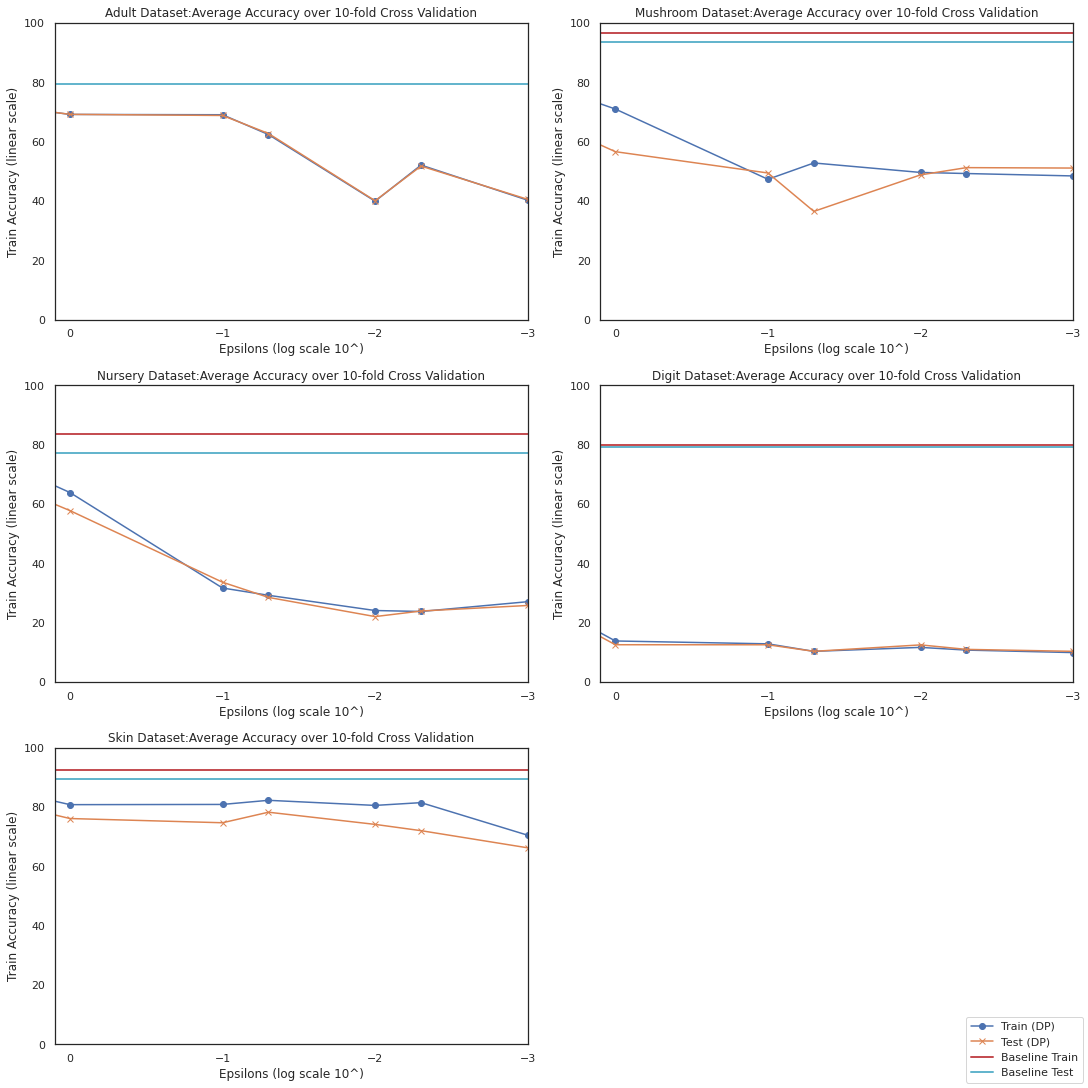

In [7]:
fig, axs = plt.subplots(3,2,figsize=(15,15), constrained_layout=True)

fig.delaxes(axs[2,1])

epsilons = np.log10(epsilons)

dataset_name = "adult"
plot_result(
    axs[0,0], 
    dataset_name, 
    baselines[dataset_name][0],
    baselines[dataset_name][1], 
    dp_results[dataset_name][0], 
    dp_results[dataset_name][1], 
    epsilons
)

dataset_name = "mushroom"
plot_result(
    axs[0,1], 
    dataset_name, 
    baselines[dataset_name][0],
    baselines[dataset_name][1], 
    dp_results[dataset_name][0], 
    dp_results[dataset_name][1], 
    epsilons
)

dataset_name = "nursery"
plot_result(
    axs[1,0], 
    dataset_name, 
    baselines[dataset_name][0],
    baselines[dataset_name][1], 
    dp_results[dataset_name][0], 
    dp_results[dataset_name][1], 
    epsilons
)

dataset_name = "digit"
plot_result(
    axs[1,1], 
    dataset_name, 
    baselines[dataset_name][0],
    baselines[dataset_name][1], 
    dp_results[dataset_name][0], 
    dp_results[dataset_name][1], 
    epsilons
)

dataset_name = "skin"
plot_result(
    axs[2,0], 
    dataset_name, 
    baselines[dataset_name][0],
    baselines[dataset_name][1], 
    dp_results[dataset_name][0], 
    dp_results[dataset_name][1], 
    epsilons
)


handles, labels = axs[2,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')

plt.savefig("./result.png")